In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



In [3]:
def lists_to_ordered_dict(keys, values):
    # 合并两个列表为元组列表
    combined_list = zip(keys, values)

    # 根据值进行排序
    sorted_list = sorted(combined_list, key=lambda x: x[1])

    # 创建有序字典
    ordered_dict = {}
    for item in sorted_list:
        ordered_dict[item[0]] = item[1]

    return ordered_dict

In [4]:
def check_duplicates(lst):
    return len(lst) != len(set(lst))

# HK_SMALL

本实验是基于随机取有点的bound的策略来选取query的bound, 在单个hk数据集（黄埔48685372个点）上实验，记录了纯rtree， octree+rtree, octree+kdtree的构建时间和索引时间

In [5]:
file_path = "result_hkm_random/Result_OR.txt"
the_first = 1
time_list = []
count_list = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        if(the_first):
            the_first = 0
            continue
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list.append(float(words[0]))
        the_last = float(words[0])
        count_list.append(float(words[-2]))
        
dict = lists_to_ordered_dict(time_list, count_list)
time_list_or = dict.keys()
count_list_or = dict.values()
        

In [6]:
file_path = "result_hkm_random/Result_R.txt"
the_first = 1
time_list = []
count_list = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        if(the_first):
            the_first = 0
            continue
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list.append(float(words[0]))
        the_last = float(words[0])
        count_list.append(float(words[-2]))
        
dict = lists_to_ordered_dict(time_list, count_list)
time_list_r = dict.keys()
count_list_r = dict.values()

In [7]:
file_path = "result_hkm_random/Result_OK.txt"
the_first = 1
time_list = []
count_list = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        if(the_first):
            the_first = 0
            continue
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list.append(float(words[0]))
        the_last = float(words[0])
        count_list.append(float(words[-2]))

dict = lists_to_ordered_dict(time_list, count_list)
time_list_ok = dict.keys()
count_list_ok = dict.values()

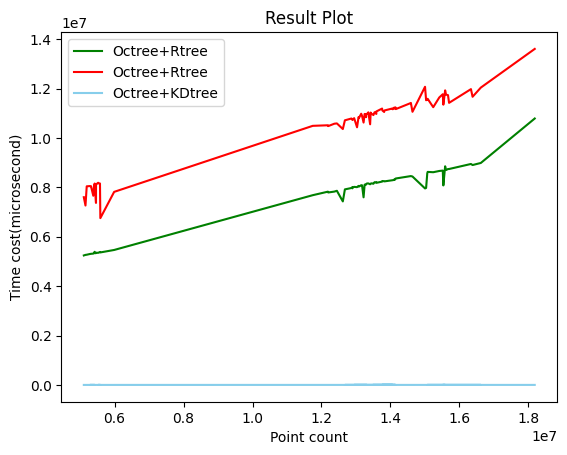

In [8]:
sub_axix = filter(lambda x:x%200 == 0, count_list_or)
plt.title('Result Plot')
plt.plot(count_list_or, time_list_or, color='green', label='Octree+Rtree')
plt.plot(count_list_or, time_list_r, color='red', label='Octree+Rtree')
plt.plot(count_list_ok, time_list_ok,  color='skyblue', label='Octree+KDtree')
# plt.plot(count_list_or, thresholds, color='blue', label='threshold')
plt.legend() # 显示图例


plt.xlabel('Point count')
plt.ylabel('Time cost(microsecond)')
plt.show()

问题依然，这个octree+kdtree时间消耗有点太低了，但是单拿出来看又很正常，不知道啥原因。

单拿出来，感觉也没啥问题

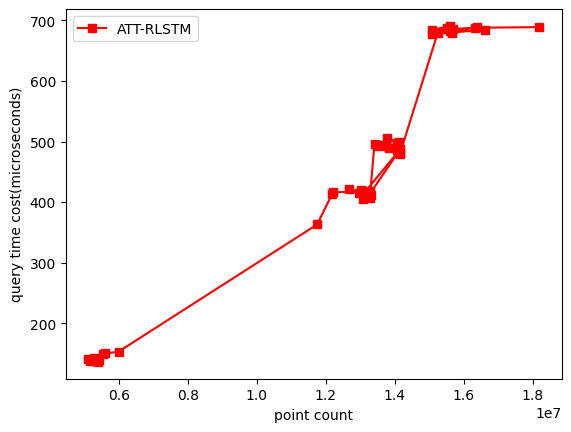

In [9]:
file_path = "result_hkm_random/Result_OK.txt"
the_first = 1
time_list = []
count_list = []
the_last=1000000000
try:
    with open(file_path, "r") as file:
        for line in file:
            if(the_first):
                the_first = 0
                continue
            # Process each line here
            line = line.strip()  # Example: Print each line
            index = line.index("Time cost =") + len("Time cost =")
            words = line[index:].split()
            if float(words[0])>the_last*10.:
                continue
            time_list.append(float(words[0]))
            the_last = float(words[0])
            count_list.append(float(words[-2]))
except FileNotFoundError:
    print("File not found.")
import matplotlib.pyplot as plt

dict = lists_to_ordered_dict(time_list, count_list)
time_lists = dict.keys()
count_list = dict.values()
plt.plot(count_list,time_lists,'s-',color = 'r',label="ATT-RLSTM")#s-:方形
plt.xlabel("point count")#横坐标名字
plt.ylabel("query time cost(microseconds)")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()